# <div align="center"> CycleGAN: horse2zebra  </div>

In [1]:
%reload_ext autoreload
%autoreload 2

In [6]:
import sys
import time
import os
import base64
import requests
import json
from io import BytesIO
from PIL import Image
from IPython.display import HTML
from k12libs.utils.nb_easy import k12ai_get_data

In [4]:
g_host = '116.85.5.40'
g_port = 8119
g_user = '16601548608'
g_uuid = '400'

api = 'k12ai/framework/execute'

In [26]:
config = {
    'dataroot': '/datasets/mnist',
    'checkpoints_dir': '/cache/ckpts',
    'serial_batches': False,
    'num_threads': 8,
    'latent_dim': 100,
    'batch_size': 256,
    'print_freq': 5120,
    'save_latest_freq': 10240,
    'continue_train': True,
    'lr': 0.002,
    'n_epochs': 100,
    'results_dir': '/cache/results',
    'verbose': True,
}

In [10]:
def post_gan_request(uri, op, user, uuid, params=None):
    if not params:
        params = '{}'
    if isinstance(params, dict):
        params = json.dumps(params)
    data = json.loads('''{
        "token": "123456",
        "op":"%s",
        "user": "%s",
        "service_name": "k12gan",
        "service_uuid": "%s",
        "service_params": %s
    }''' % (op, user, uuid, params))
    api = 'http://%s:%d/%s' % (g_host, g_port, uri)
    res = requests.post(url=api, json=data).text
    key = op.split('.')[0]
    return {
        'req': data,
        'res': json.loads(res),
        'key': f'framework/16601548608/{uuid}/{key}'
    }

### 启动训练(train.start)

In [27]:
res = post_gan_request(api, 'train.start', g_user, g_uuid,  config)
res

{'req': {'token': '123456',
  'op': 'train.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '400',
  'service_params': {'dataroot': '/datasets/mnist',
   'checkpoints_dir': '/cache/ckpts',
   'serial_batches': False,
   'num_threads': 8,
   'latent_dim': 100,
   'batch_size': 256,
   'print_freq': 512,
   'save_latest_freq': 2048,
   'continue_train': True,
   'lr': 0.002,
   'n_epochs': 100,
   'results_dir': '/cache/results',
   'verbose': True}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/400/train'}

In [12]:
k12ai_get_data(res['key'], 'metrics', num=2, waitcnt=60, rm=True)

[{'key': 'framework/16601548608/400/train/metrics/1611915052888',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.start',
   'service_name': 'k12gan',
   'service_uuid': '400',
   'timestamp': 1611915052888,
   'datetime': '20210129181052',
   'data': [{'_id_': '2a56e1b04c3d8645',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_G_loss',
      'payload': {'x': {'label': 'iteration', 'value': 12800},
       'y': [{'label': 'G_loss', 'value': 2.914}]}}},
    {'_id_': 'eeadd07414ef22c2',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_Dr_loss',
      'payload': {'x': {'label': 'iteration', 'value': 12800},
       'y': [{'label': 'Dr_loss', 'value': 0.378}]}}},
    {'_id_': 'b7909ac946e8ca6b',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_Df_loss',
      'payload': {'x': {'label': 'iteration'

### 停止训练((train.stop)

In [13]:
post_gan_request(api, 'train.stop', g_user, g_uuid)

{'req': {'token': '123456',
  'op': 'train.stop',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '400',
  'service_params': {}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/400/train'}

### 恢复训练(train.resume)

In [11]:
res = post_gan_request(api, 'train.resume', g_user, g_uuid)
res

{'req': {'token': '123456',
  'op': 'train.resume',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '200',
  'service_params': {}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/200/train'}

In [12]:
k12ai_get_data(res['key'], 'metrics', num=2, waitcnt=60, rm=True)

[{'key': 'framework/16601548608/200/train/metrics/1611716656263',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.resume',
   'service_name': 'k12gan',
   'service_uuid': '200',
   'timestamp': 1611716656263,
   'datetime': '20210127110416',
   'data': [{'_id_': '29f8d6abe3f2d9fe',
     'category': '训练',
     'type': 'scalar',
     'data': {'title': '训练_学习率',
      'payload': {'x': {'label': 'iteration', 'value': 20},
       'y': [{'label': '学习率', 'value': 0.002}]}}}]}},
 {'key': 'framework/16601548608/200/train/metrics/1611716656345',
  'value': {'version': '0.1.0',
   'server': 'localhost:8119',
   'type': 'metrics',
   'appId': 'talentai',
   'token': '123456',
   'user': '16601548608',
   'op': 'train.resume',
   'service_name': 'k12gan',
   'service_uuid': '200',
   'timestamp': 1611716656345,
   'datetime': '20210127110416',
   'data': [{'_id_': '00e1533091

In [13]:
post_gan_request(api, 'train.stop', g_user, g_uuid)
time.sleep(5)

### 启动预测

In [34]:
post_gan_request(api, 'predict.start', g_user, g_uuid)

{'req': {'token': '123456',
  'op': 'predict.start',
  'user': '16601548608',
  'service_name': 'k12gan',
  'service_uuid': '400',
  'service_params': {}},
 'res': {'code': 100000, 'message': {'en': 'success', 'cn': '成功'}},
 'key': 'framework/16601548608/400/predict'}

In [45]:
test_result = None
data = k12ai_get_data('framework/16601548608/400/predict', 'metrics', num=1, waitcnt=30, rm=True)
if data is not None:
    d = item['value']['data'][0]['data']
    test_result = base64.b64decode(d['payload'])

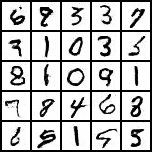

In [46]:
Image.open(BytesIO(test_result))